### Parte 1: Analizando Tendencias de Best-Sellers entre Categorías de Producto

**Objetivo**: Comprender la relación entre las categorías de productos y su estatus de best-seller.

1. **Análisis de Tabla Cruzada (Crosstab)**:
    - Crea una tabla cruzada entre la `category` del producto y el estatus `isBestSeller`.
    
    - ¿Existen categorías donde ser best-seller sea más frecuente? 
    	
    	*Pista: una opción es calcular la proporción de productos best-seller para cada categoría y luego ordenar las categorías en función de esta proporción de forma descendente.*


2. **Pruebas Estadísticas**:
    - Realiza una prueba Chi-cuadrado para determinar si la distribución de best-sellers es independiente de la categoría del producto.
    - Calcula el **V de Cramér** para entender la fuerza de la asociación entre el estatus de best-seller y la categoría.

3. **Visualizaciones**:
	- Visualiza la relación entre las categorías de productos y el estatus de best-seller utilizando un gráfico de barras apiladas.

In [1]:
import pandas as pd
import csv
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:/Users/Elías/Desktop/Cajon de Sastre/Bootcamp/GitHub/lab-eda-bivariate/amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


1. **Análisis de Tabla Cruzada (Crosstab)**:

In [ ]:
# Crea una tabla cruzada entre la `category` del producto y el estatus `isBestSeller`

tabla_cruzada = pd.crosstab(df['category'], df['isBestSeller'])
tabla_cruzada

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [7]:
# Añadir columna con la proporción
proporcion = (tabla_cruzada[True] / tabla_cruzada.sum(axis=1)).sort_values(ascending=False)
proporcion

category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
                                    ...   
Bedding Collections               0.000000
CPUs                              0.000000
CD, Disc & Tape Players           0.000000
Blank Media Cases & Wallets       0.000000
eBook Readers & Accessories       0.000000
Length: 296, dtype: float64

In [8]:
# Tabla completa ordenada por % de best-sellers
tabla_final = tabla_cruzada.copy()
tabla_final['best_seller_ratio'] = proporcion

tabla_final.sort_values('best_seller_ratio', ascending=False)

isBestSeller,False,True,best_seller_ratio
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
Bedding Collections,6309,0,0.000000
CPUs,249,0,0.000000
"CD, Disc & Tape Players",8798,0,0.000000


Sí. Al calcular la proporción de productos best-seller dentro de cada categoría, se observa que algunas categorías tienen un porcentaje significativamente mayor de productos con estatus “best-seller” que otras.
Estas categorías aparecen en las primeras posiciones del ranking (best_seller_ratio), lo que indica que tienen una mayor probabilidad de producir productos best-seller.

2. **Pruebas Estadísticas**:

In [9]:
from scipy.stats import chi2_contingency
import numpy as np

In [10]:
# Prueba Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(tabla_cruzada)

print("Chi-cuadrado:", chi2)
print("p-value:", p)
print("Grados de libertad:", dof)

Chi-cuadrado: 36540.20270061387
p-value: 0.0
Grados de libertad: 295


La distribución de productos best-seller no es independiente de la categoría.
Es decir, la categoría influye en la probabilidad de ser best-seller.

In [11]:
# V de Cramér
n = tabla_cruzada.sum().sum()
phi2 = chi2 / n
r, k = tabla_cruzada.shape

In [13]:
phi2_corr = max(0, phi2 - ((k - 1)*(r - 1))/(n - 1))
r_corr = r - ((r - 1)**2)/(n - 1)
k_corr = k - ((k - 1)**2)/(n - 1)
v_cramer = np.sqrt(phi2_corr / min((k_corr - 1), (r_corr - 1)))

print("V de Cramér:", v_cramer)

V de Cramér: 0.12178835496344273


Como category suele tener muchas clases, lo normal es que la relación sea débil pero significativa.

3. **Visualizaciones**:

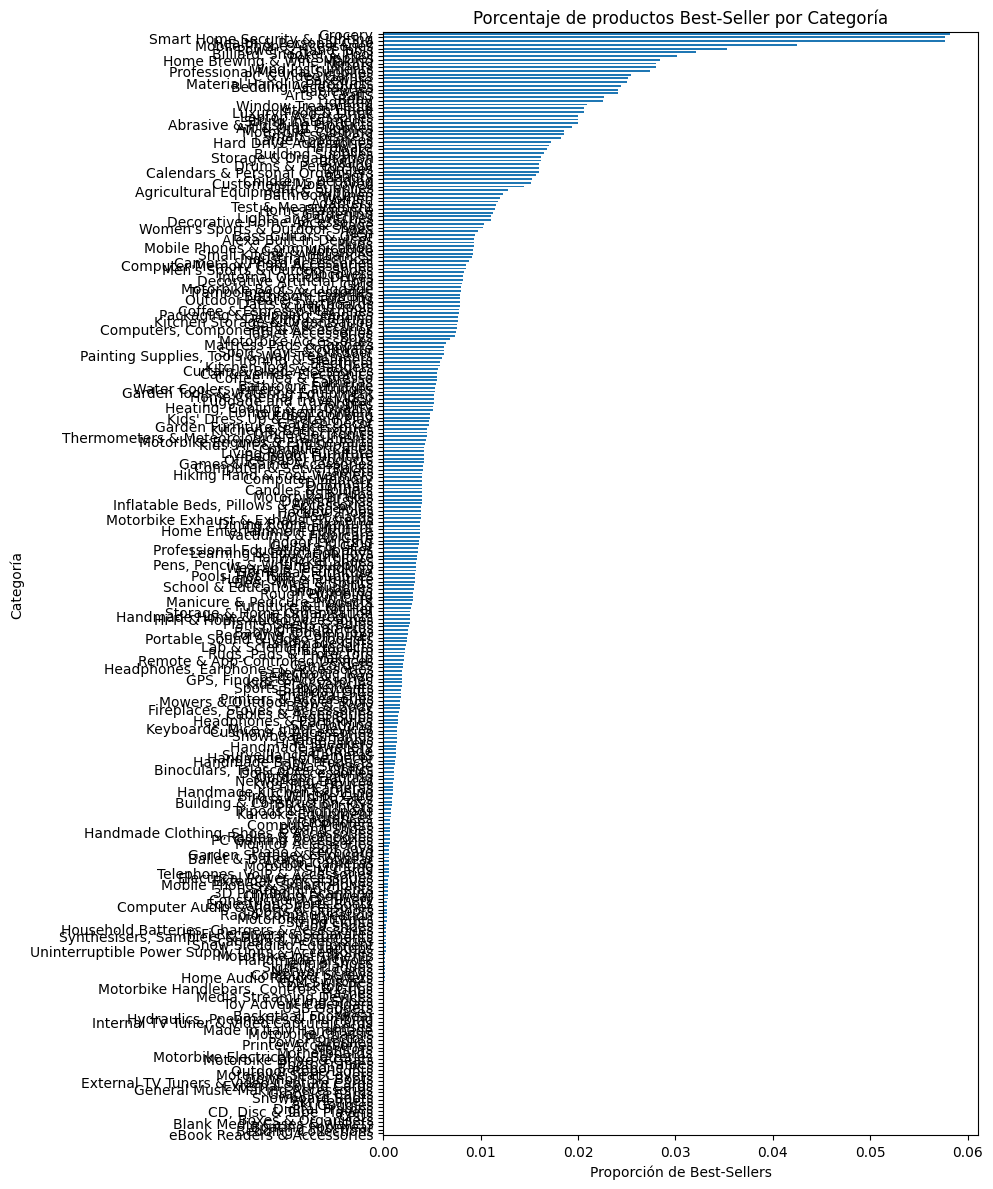

In [20]:
proporcion = (tabla_cruzada[True] / tabla_cruzada.sum(axis=1))

plt.figure(figsize=(10, 12))
proporcion.sort_values().plot(
    kind="barh"
)

plt.title("Porcentaje de productos Best-Seller por Categoría")
plt.xlabel("Proporción de Best-Sellers")
plt.ylabel("Categoría")
plt.tight_layout()
plt.show()